In [49]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import csv
import math
import seaborn as sns

In [50]:
df = pd.read_csv('/Users/nickwalter/Downloads/tv_shows.csv')
df

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5363,5363,5713,Paradise Islands,2017,NaN,NaN,10/100,0,0,0,1,1
5364,5364,5714,Mexico Untamed,2018,NaN,NaN,10/100,0,0,0,1,1
5365,5365,5715,Wild Centeral America,2020,NaN,NaN,10/100,0,0,0,1,1
5366,5366,5716,Wild Russia,2018,NaN,NaN,10/100,0,0,0,1,1


In [51]:
df.drop(columns=['Unnamed: 0', 'Type'])

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5363,5713,Paradise Islands,2017,NaN,NaN,10/100,0,0,0,1
5364,5714,Mexico Untamed,2018,NaN,NaN,10/100,0,0,0,1
5365,5715,Wild Centeral America,2020,NaN,NaN,10/100,0,0,0,1
5366,5716,Wild Russia,2018,NaN,NaN,10/100,0,0,0,1


In [53]:
#convert ratings into fractions

df.drop(columns=['Unnamed: 0'])
df[["numerator", "denominator"]] = df["IMDb"].str.split("/", expand=True)
df["imdb"] = df["numerator"].astype(float) / df["denominator"].astype(float)

df[["numer", "denom"]] = df["Rotten Tomatoes"].str.split("/", expand=True)
df["rotten_tomatoes"] = df["numer"].astype(float) / df["denom"].astype(float)
df = df.drop(columns=['numerator', 'denominator', 'numer', 'denom'])
df = df.drop(columns=['IMDb', 'Rotten Tomatoes'])


In [54]:
#checking if this makes sense
df['imdb'].mean()

0.7086019064911485

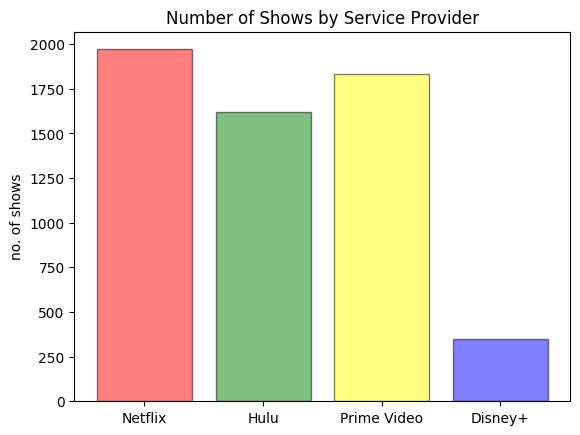

In [55]:
#how many shows does each service have? 
fig, ax = plt.subplots()

service = ('Netflix','Hulu','Prime Video','Disney+')
count = [df['Netflix'].sum(), df['Hulu'].sum(), df['Prime Video'].sum(), df['Disney+'].sum()]
bar_labels = service
bar_colors = ['red', 'green', 'yellow', 'blue']

ax.bar(service, count, label=bar_labels, color=bar_colors, alpha=.5, edgecolor = 'black')

ax.set_ylabel('no. of shows')
ax.set_title('Number of Shows by Service Provider')

plt.show()

In [56]:
count

[1971, 1621, 1831, 351]

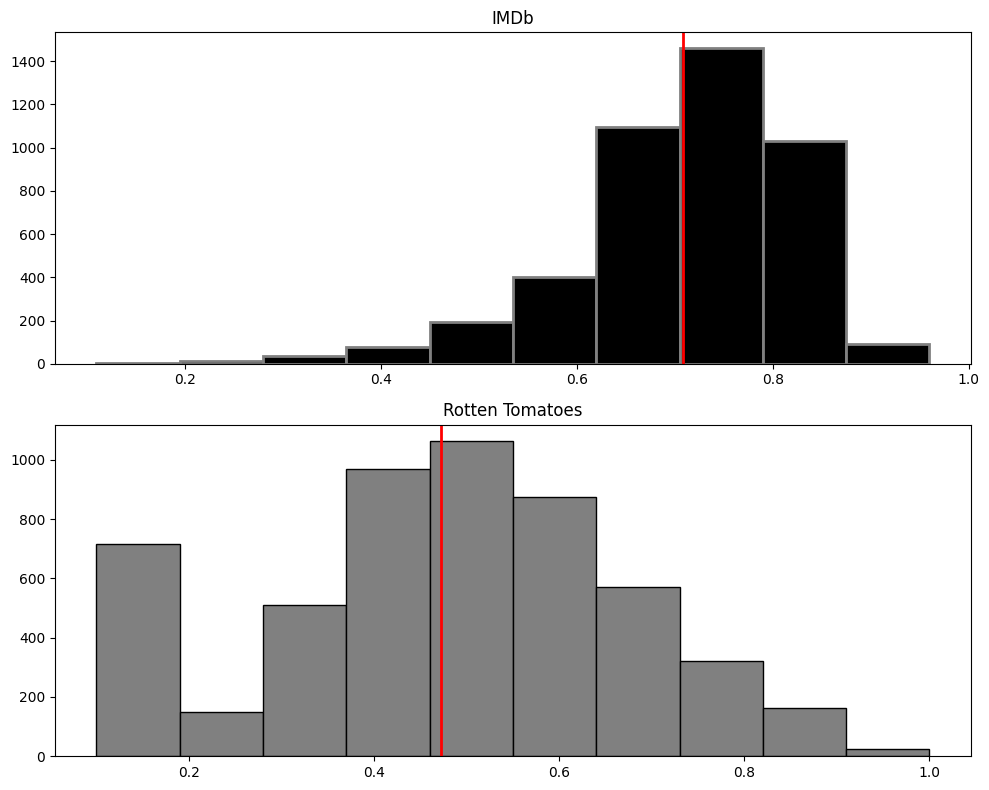

In [57]:
#graphing histogram of scores
data1 = df['imdb']
data2 = df['rotten_tomatoes']
data2 = data2.dropna()
data1 = data1.dropna()

fig, axes = plt.subplots(2,1, figsize=(10, 8))

# Plot data on each subplot
axes[0].hist(data1, bins = 10, edgecolor = 'grey',  linewidth = 2, color='black')
axes[0].set_title('IMDb')

axes[1].hist(data2, bins = 10, edgecolor = 'black', color='grey')
axes[1].set_title('Rotten Tomatoes')

#mean line
axes[0].axvline(data1.mean(), color='red', linewidth=2)
axes[1].axvline(data2.mean(), color='red', linewidth=2)

plt.tight_layout()


plt.show()

In [58]:
#checking what the age sections look like
a = df['Age'].unique()
print(a)

['18+' '16+' '7+' 'all' nan '13+']


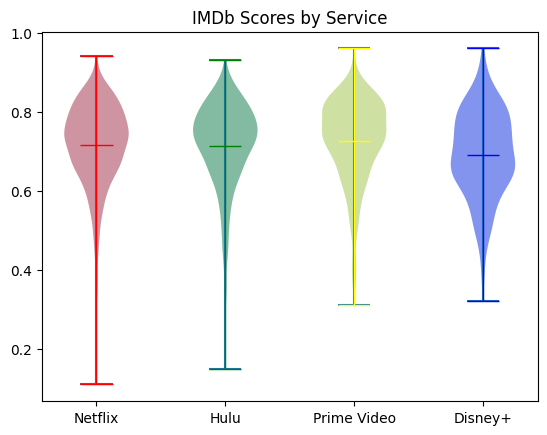

In [59]:
#violin plots of ratings for each service
dfnetflix = df[df['Netflix'] !=0]
dfnetflix = dfnetflix.dropna()

dfhulu = df[df['Hulu'] != 0]
dfhulu = dfhulu.dropna()

dfprime = df[df['Prime Video'] !=0]
dfprime = dfprime.dropna()

dfdisney = df[df['Disney+'] !=0]
dfdisney = dfdisney.dropna()

fig, ax = plt.subplots()

data = (dfnetflix['imdb'], dfhulu['imdb'], dfprime['imdb'], dfdisney['imdb'])

companies = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
ax.violinplot(data, vert=True)
plt.xticks(np.arange(1, len(companies) + 1), companies)

plots = ax.violinplot(data, showmeans = True, showextrema = True)

colors = ['Red', 'Green', 'Yellow', 'Blue']

for pc, color in zip(plots['bodies'], colors):
    pc.set_facecolor(color)

for partname in ('cbars','cmins','cmaxes','cmeans'):
    vp = plots[partname]
    vp.set_edgecolor(colors)
    vp.set_linewidth(1)
    
plt.title('IMDb Scores by Service')
plt.show()

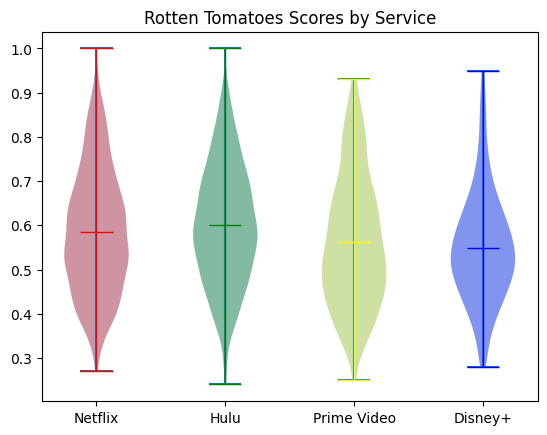

In [60]:
dfnetflix = df[df['Netflix'] !=0]
dfnetflix = dfnetflix.dropna()

dfhulu = df[df['Hulu'] != 0]
dfhulu = dfhulu.dropna()

dfprime = df[df['Prime Video'] !=0]
dfprime = dfprime.dropna()

dfdisney = df[df['Disney+'] !=0]
dfdisney = dfdisney.dropna()

fig, ax = plt.subplots()

data = (dfnetflix['rotten_tomatoes'], dfhulu['rotten_tomatoes'], dfprime['rotten_tomatoes'], dfdisney['rotten_tomatoes'])

companies = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
ax.violinplot(data, vert=True)
plt.xticks(np.arange(1, len(companies) + 1), companies)

plots = ax.violinplot(data, showmeans = True, showextrema = True)

colors = ['Red', 'Green', 'Yellow', 'Blue']

for pc, color in zip(plots['bodies'], colors):
    pc.set_facecolor(color)

for partname in ('cbars','cmins','cmaxes','cmeans'):
    vp = plots[partname]
    vp.set_edgecolor(colors)
    vp.set_linewidth(1)

plt.title('Rotten Tomatoes Scores by Service')

plt.show()

In [61]:
df = pd.read_csv('/Users/nickwalter/Downloads/tv_shows.csv')
df

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5363,5363,5713,Paradise Islands,2017,NaN,NaN,10/100,0,0,0,1,1
5364,5364,5714,Mexico Untamed,2018,NaN,NaN,10/100,0,0,0,1,1
5365,5365,5715,Wild Centeral America,2020,NaN,NaN,10/100,0,0,0,1,1
5366,5366,5716,Wild Russia,2018,NaN,NaN,10/100,0,0,0,1,1


In [62]:
#does IMDb and Rotten Tomatoes rate the same TV shows similarly? 

df[["numerator", "denominator"]] = df["IMDb"].str.split("/", expand=True)
df["imdb"] = df["numerator"].astype(float) / df["denominator"].astype(float)

df[["numer", "denom"]] = df["Rotten Tomatoes"].str.split("/", expand=True)
df["rotten_tomatoes"] = df["numer"].astype(float) / df["denom"].astype(float)

df = df.drop(columns = ["numerator", "denominator", "numer", "denom"])


In [63]:
#finding max point to plot on next graph

dif = (df['imdb'] - df['rotten_tomatoes'])

df['dif'] = dif

max = dif.max()

row_index = df.index.get_loc(df[df['dif'] == max].index[0])
print(df.iloc[[row_index]])



      Unnamed: 0    ID          Title  Year  Age    IMDb Rotten Tomatoes  \
3239        3239  3371  LittleBabyBum  2011  NaN  9.0/10          31/100   

      Netflix  Hulu  Prime Video  Disney+  Type  imdb  rotten_tomatoes   dif  
3239        0     1            0        0     1   0.9             0.31  0.59  


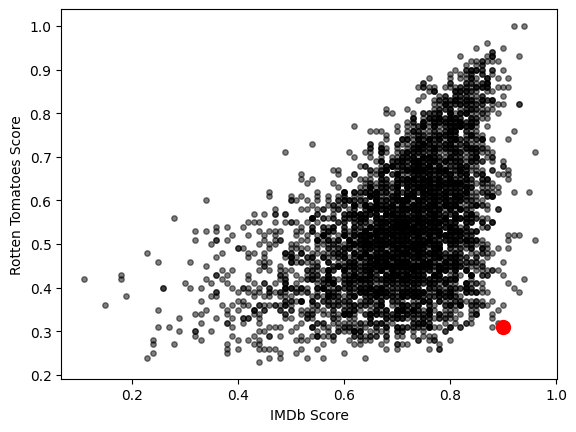

In [64]:
#plotting imdb vs rotten tomatoes for each tv show

x=df['imdb']
y=df['rotten_tomatoes']

xmax = .9
ymax = .31
fig, ax = plt.subplots()

ax.scatter(x,y, color='k', s=15, alpha=.5)
ax.scatter(xmax,ymax, color='red',s=100)

ax.set_ylabel('Rotten Tomatoes Score')
ax.set_xlabel('IMDb Score')
plt.show()

In [65]:
(df['Year']).max()

2021

In [66]:
#comparing means of scores per rating 

print(df['imdb'].mean())
print(df['rotten_tomatoes'].mean())

0.7086019064911485
0.4722038002980626


In [67]:
print(x.sum() / len(x))
print(y.sum() / len(y))

0.581613263785395
0.4722038002980626


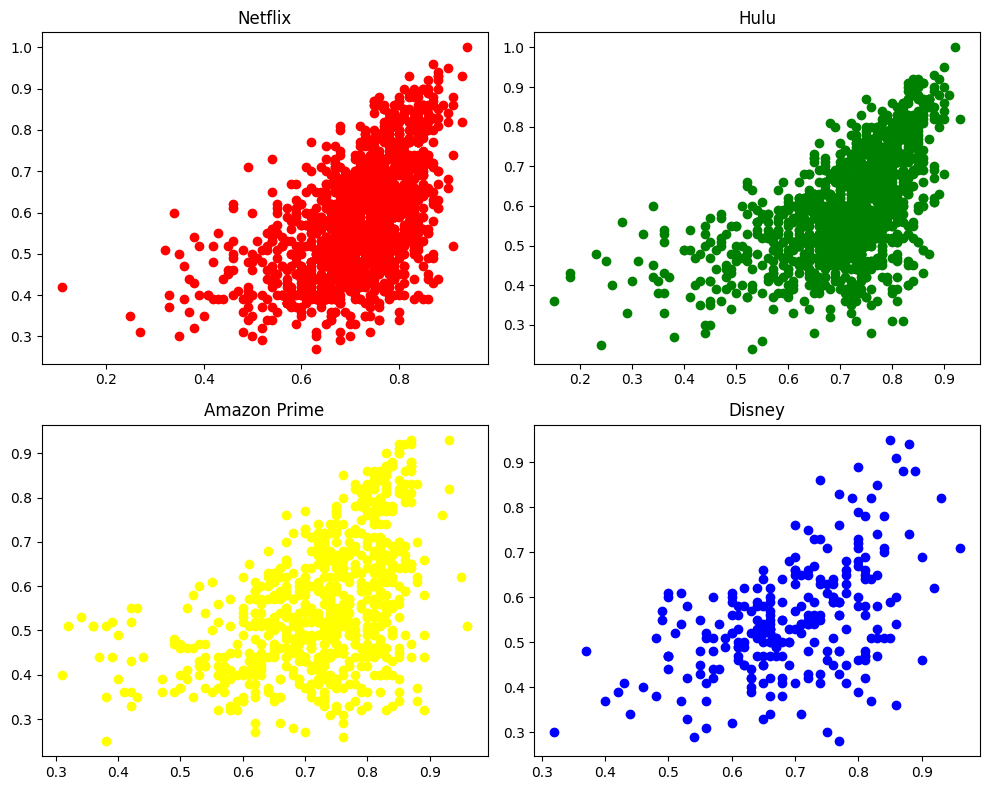

In [68]:
#same plot as above but broken out by streaming services

xn = dfnetflix['imdb']
yn = dfnetflix['rotten_tomatoes']

xh = dfhulu['imdb']
yh = dfhulu['rotten_tomatoes']

xp = dfprime['imdb']
yp = dfprime['rotten_tomatoes']

xd = dfdisney['imdb']
yd = dfdisney['rotten_tomatoes']

x1, x2, x3, x4 = xn, xh, xp, xd
y1, y2, y3, y4 = yn, yh, yp, yd

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot data on each subplot
axes[0, 0].scatter(x1, y1, color='red')
axes[0, 0].set_title('Netflix')

axes[0, 1].scatter(x2, y2, color='green')
axes[0, 1].set_title('Hulu')

axes[1, 0].scatter(x3, y3, color='yellow')
axes[1, 0].set_title('Amazon Prime')

axes[1, 1].scatter(x4, y4, color='blue')
axes[1, 1].set_title('Disney')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

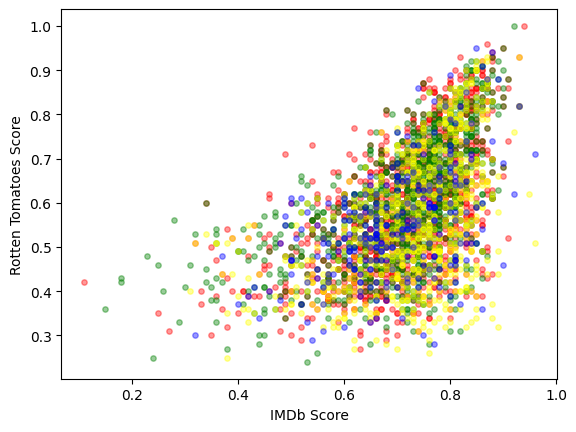

In [69]:
#same graphs combined above with color this time

platform = ['Netflix', 'Hulu', 'Amazon', 'Disney']

fig, ax = plt.subplots()

ax.scatter(x1, y1, s=15, c = 'Red', alpha=.4)
ax.scatter(x2, y2, s=15, c = 'Green', alpha=.4)
ax.scatter(x3, y3, s=15, c = 'Yellow', alpha=.4)
ax.scatter(x4, y4, s=15, c = 'Blue', alpha=.4)


ax.set_ylabel('Rotten Tomatoes Score')
ax.set_xlabel('IMDb Score')
plt.show()


In [70]:
#finding average rating for each service by each rating company

dfmeans = []
dfmeans = pd.DataFrame(columns=('Average Rotten Tomatoes', 'Average IMDb', 'Pct Over 8/10 or 80/100'))

net_avg_rt = dfnetflix['rotten_tomatoes'].mean()
hul_avg_rt = dfhulu['rotten_tomatoes'].mean()
pri_avg_rt = dfprime['rotten_tomatoes'].mean()
dis_avg_rt = dfdisney['rotten_tomatoes'].mean()

net_avg_imdb = dfnetflix['imdb'].mean()
hul_avg_imdb = dfhulu['imdb'].mean()
pri_avg_imdb = dfprime['imdb'].mean()
dis_avg_imdb = dfdisney['imdb'].mean()

In [71]:
#finding total number of shows and then seeing how many shows you get per dollar based on pricing of each show per month

print(df['Netflix'].sum()/9,
      df['Hulu'].sum()/7,
      df['Prime Video'].sum()/13,
      df['Disney+'].sum()/8)
      

219.0 231.57142857142858 140.84615384615384 43.875


In [72]:
#finding total points of each service and fiding price per service point

streaming_services = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
prices = [9, 7, 13, 8]
points = {}

for service, price in zip(streaming_services, prices):
    points[service] = round((df[service] * df['imdb']).sum() / price)

# Example usage:
netflix_pts = points['Netflix']
hulu_pts = points['Hulu']
prime_pts = points['Prime Video']
disney_pts = points['Disney+']

# Printing each variable
print("Netflix Service Points:", netflix_pts)
print("Hulu Service Points:", hulu_pts)
print("Prime Video Service Points:", prime_pts)
print("Disney+ Service Points:", disney_pts)

Netflix Service Points: 148
Hulu Service Points: 143
Prime Video Service Points: 65
Disney+ Service Points: 27


In [73]:
#finding top 10 shows for each service 

means = {}
for service in streaming_services:
    x = df[service] * df['imdb']
    means[service] = (x.nlargest(10)).mean()
    y = round(means[service],3)
    print(service,"'s top 10 average is", y)




Netflix 's top 10 average is 0.917
Hulu 's top 10 average is 0.909
Prime Video 's top 10 average is 0.928
Disney+ 's top 10 average is 0.911


In [74]:
#points per dollar of top 10 shows
per_dollar = {}

for service,price in zip(streaming_services, prices):
    points = y/price
    points = round(points, 4)
    print(points*100)

10.12
13.01
7.01
11.39


In [75]:
print(np.corrcoef(dfnetflix['imdb'], dfnetflix['rotten_tomatoes'])[0, 1])
print(np.corrcoef(dfhulu['imdb'], dfhulu['rotten_tomatoes'])[0, 1])
print(np.corrcoef(dfprime['imdb'], dfprime['rotten_tomatoes'])[0, 1])
print(np.corrcoef(dfdisney['imdb'], dfdisney['rotten_tomatoes'])[0, 1])

#interesting the correlations are low between ranking sites

0.5473001358857132
0.5754622923507816
0.4678263469418479
0.4965224587348202
